<a href="https://colab.research.google.com/github/Harshh18/Computer-Vision-Practicals/blob/main/Exp4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

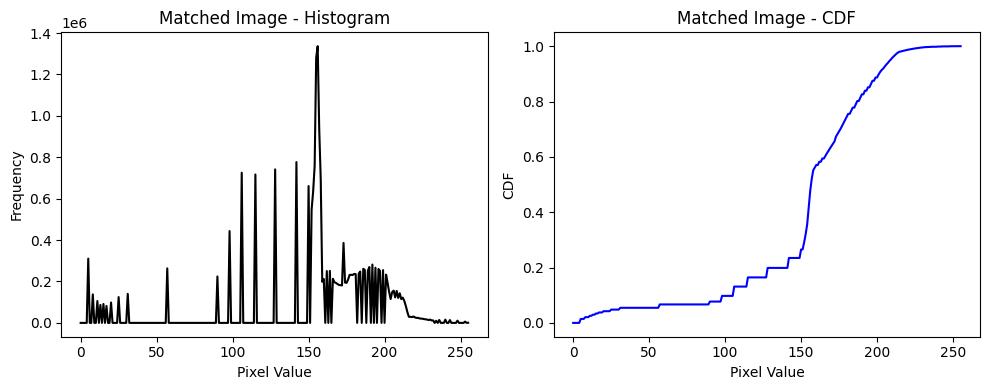

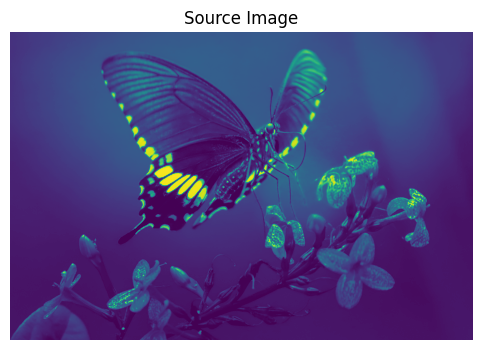

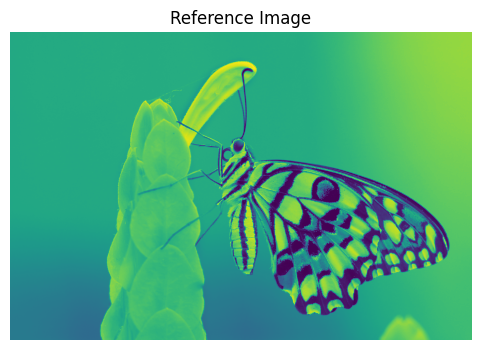

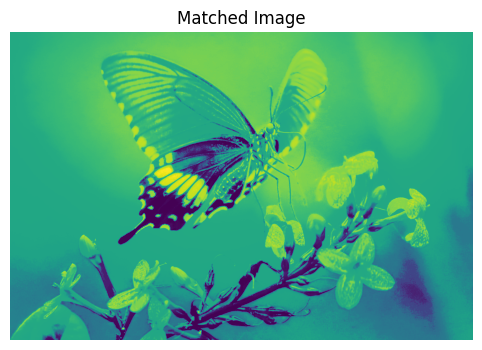

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def calculate_histogram(image):
    """Calculates the histogram of an image."""
    histogram, bins = np.histogram(image.flatten(), 256, [0, 256])
    return histogram

def calculate_cdf(histogram):
    """Calculates the cumulative distribution function (CDF) for a histogram."""
    cdf = histogram.cumsum()
    cdf_normalized = cdf / cdf.max()  # Normalize to range [0,1]
    return cdf_normalized

def create_mapping_function(source_cdf, reference_cdf):
    """Creates a mapping function to match the source CDF to the reference CDF."""
    mapping = np.zeros(256)
    for src_pixel_value in range(256):
        closest_reference_value = np.argmin(np.abs(reference_cdf - source_cdf[src_pixel_value]))
        mapping[src_pixel_value] = closest_reference_value
    return mapping

def apply_mapping(source_image, mapping):
    """Applies the mapping function to transform the source image."""
    matched_image = cv2.LUT(source_image, mapping.astype('uint8'))
    return matched_image

def histogram_matching(source_image, reference_image):
    """Performs histogram matching on the source image using the reference image."""
    # Compute histograms
    source_hist = calculate_histogram(source_image)
    reference_hist = calculate_histogram(reference_image)
    # Compute CDFs
    source_cdf = calculate_cdf(source_hist)
    reference_cdf = calculate_cdf(reference_hist)
    # Create mapping function
    mapping = create_mapping_function(source_cdf, reference_cdf)
    # Apply mapping to source image
    matched_image = apply_mapping(source_image, mapping)
    return matched_image

def plot_histograms(image, title="Histogram"):
    """Plot histogram and CDF of an image."""
    histogram = calculate_histogram(image)
    cdf = calculate_cdf(histogram)
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.plot(histogram, color='black')
    plt.title(f'{title} - Histogram')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    plt.subplot(1, 2, 2)
    plt.plot(cdf, color='blue')
    plt.title(f'{title} - CDF')
    plt.xlabel('Pixel Value')
    plt.ylabel('CDF')
    plt.tight_layout()
    plt.show()

def display_images(original_image, title):
    """Display the original and transformed images side by side."""
    plt.figure(figsize=(10, 4))
    plt.subplot(1,1,1)
    plt.imshow(original_image)
    plt.title(f'{title}')
    plt.axis('off')
    plt.show()

# Load the source and reference images in grayscale
source_image = cv2.imread('/content/Butterfly-image.jpg', cv2.IMREAD_GRAYSCALE)
reference_image = cv2.imread('/content/Butterfly2.jpg', cv2.IMREAD_GRAYSCALE)

# Perform histogram matching
matched_image = histogram_matching(source_image, reference_image)

# Save or display the resulting image
cv2.imwrite('matched_image.jpg', matched_image)

# Plot histograms and CDFs
plot_histograms(matched_image, title="Matched Image")

# Display the images
display_images(source_image, 'Source Image')
display_images(reference_image, 'Reference Image')
display_images(matched_image,'Matched Image')
